## Load data and Preprocessing data

In [ ]:
from google.colab import drive
drive.mount("/drive")

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


In [ ]:
import pandas as pd
from numpy import nan

data = pd.read_csv("/drive/My Drive/Colab Notebooks/CCST Survey_20221109_Text_Answers.csv")
corpus = data['teams.vid.dissatisfaction.text'].tolist()
print(corpus)
#drop NA values in corpus
corpus=[item for item in corpus if not(pd.isnull(item)) == True]
print(corpus)

[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 'Not a fan of features compared to zoom', nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, "I find Zoom more reliable and you can see more people, etc. Plus, it's easier to use for people who are not in the SU system, e.g. speakers, experts, etc. ", nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan

In [ ]:
#print size in corpus

print('size of dissatisfation texts is', len(corpus))

size of dissatisfation texts is 69


# KMeans


tfidf representation

In [ ]:
# tfidf representation
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2,stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(corpus)
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
print(len(tfidf_vectorizer.vocabulary_))

56


In [ ]:
from sklearn.cluster import KMeans

K = 5
tfidf_model = KMeans(n_clusters=K, random_state=0)
tfidf_model.fit(tfidf)
labels=tfidf_model.labels_.tolist() 

In [ ]:
#  print cluster sizes
def print_cluster_sizes(model):
  cnt_perCluster = {}
  for c in model.labels_:
    cnt_perCluster[c] = cnt_perCluster.get(c, 0)+1
  print(cnt_perCluster)

In [ ]:
print_cluster_sizes(tfidf_model)

{1: 23, 2: 10, 0: 25, 4: 8, 3: 3}


In [ ]:
# print documents closest to each centroid
import numpy as np
def print_docs_closest_to_centroids(model, vec, n):
  K = len(model.cluster_centers_)
  for j in range(K):
    d = model.transform(vec)[:, j]
    idx = np.argsort(d)[:n]
    print('\n\n======cluster #', j)
    for i in idx:
      print(corpus[i])

In [ ]:
print_docs_closest_to_centroids(tfidf_model, tfidf, 5)



======cluster # 0
not enough capacity for many attendees
Not Compatible with AirPods
can't always find it
Often cannot get access
all of the above and more


======cluster # 1
not enough capacity for many attendees
speed. It   s   l   o   w  s    e   v   e   r   y   t   h   i   n   g      d   o   w   n 
Not Compatible with AirPods
can't always find it
Often cannot get access


======cluster # 2
not enough capacity for many attendees
Often cannot get access
all of the above and more
Not Compatible with AirPods
Slows down macbook


======cluster # 3
Cannot see all participants during a videoconference
Can't see all meeting participants video feeds simultaneously
Terrible clunky program where do not see sufficient number of participants
speed. It   s   l   o   w  s    e   v   e   r   y   t   h   i   n   g      d   o   w   n 
all of the above and more


======cluster # 4
not enough capacity for many attendees
speed. It   s   l   o   w  s    e   v   e   r   y   t   h   i   n   g      d   

In [ ]:
# Plot the inertia graph
import matplotlib.pyplot as plt
def plot_inertia(inertia_list):
  plt.plot(range(1,len(inertia_list)+1), inertia_list, 'bx-')
  plt.xlabel('Values of K')
  plt.ylabel('Inertia')
  plt.title('The Elbow Method using Inertia')
  plt.show()

In [ ]:
# use the Elbow method to determine the best k
def elbow(m, corpus):
  inertia_lst = []
  for i in range(1,m+1):
    model = KMeans(n_clusters=i)
    model.fit(corpus)
    
    inertia=model.inertia_
    inertia_lst.append(inertia)
  plot_inertia(inertia_lst)

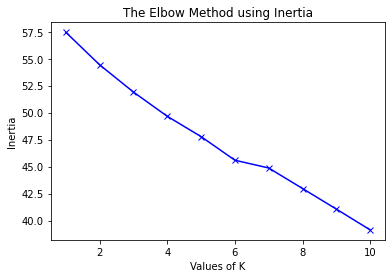

In [ ]:
elbow(10, tfidf)

In [ ]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


unigram representation

In [ ]:
# unigram representation
from sklearn.feature_extraction.text import CountVectorizer
unigram_count_vectorizer = CountVectorizer(encoding='latin-1', binary=False, stop_words='english')
uni = unigram_count_vectorizer.fit_transform(corpus)
uni_feature_names = unigram_count_vectorizer.get_feature_names_out()
print(len(unigram_count_vectorizer.vocabulary_))

300


In [ ]:
from sklearn.cluster import KMeans

K = 5
uni_model = KMeans(n_clusters=K, random_state=0)
uni_model.fit(uni)
labels=uni_model.labels_.tolist() 

In [ ]:
#  print cluster sizes
def print_cluster_sizes(model):
  cnt_perCluster = {}
  for c in model.labels_:
    cnt_perCluster[c] = cnt_perCluster.get(c, 0)+1
  print(cnt_perCluster)

In [ ]:
# print documents closest to each centroid
import numpy as np
def print_docs_closest_to_centroids(model, vec, n):
  K = len(model.cluster_centers_)
  for j in range(K):
    d = model.transform(vec)[:, j]
    idx = np.argsort(d)[:n]
    print('\n\n======cluster #', j)
    for i in idx:
      print(corpus[i])

In [ ]:
print_docs_closest_to_centroids(uni_model, uni, 5)



======cluster # 0
all of the above and more
can't always find it
too many other options
System is clunky.
clunky


======cluster # 1
I don't like that I get chat notifications from meetings, even if I don't join the meeting. I often am copied on invites for meetings that I don't join, but still get notifications from.
Don’t like that I can’t see everyone at once
I don't like that it automatically saves and records everything.  You cannot see larger groups of people during meetings.
I don't have the time to become better versed in the platform
can't always find it


======cluster # 2
The intrusiveness of the software itself. Zoom is lightweight and I can install it on my personal devices with ease. Teams is clunky and awkward to use. It attempts to impose a one-size-fits-all approach to integrating with other Microsoft software. It is a prime example of Microsoft's increasing efforts to force Windows users to adopt an always-online workstyle. Obviously Teams is on my work computer, bu

In [ ]:
# Plot the inertia graph
import matplotlib.pyplot as plt
def plot_inertia(inertia_list):
  plt.plot(range(1,len(inertia_list)+1), inertia_list, 'bx-')
  plt.xlabel('Values of K')
  plt.ylabel('Inertia')
  plt.title('The Elbow Method using Inertia')
  plt.show()

In [ ]:
# use the Elbow method to determine the best k
def elbow(m, corpus):
  inertia_lst = []
  for i in range(1,m+1):
    model = KMeans(n_clusters=i)
    model.fit(corpus)
    
    inertia=model.inertia_
    inertia_lst.append(inertia)
  plot_inertia(inertia_lst)

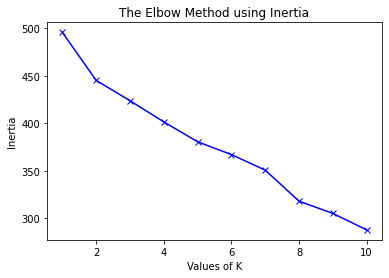

In [ ]:
elbow(10, uni)

# LDA


In [ ]:
!pip install bertopic
!pip install --upgrade joblib==1.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#LDA

# removing stopwords usually improve topic models
# stoplist is often customized to include more domain-specific topic words

from sklearn.feature_extraction import text

added_stopwords = frozenset(['just', 'did'])
my_stopwords = text.ENGLISH_STOP_WORDS.union(added_stopwords)
print(len(my_stopwords))
print(my_stopwords)

320
frozenset({'fifty', 'else', 'from', 'move', 'anyway', 'done', 'any', 'hasnt', 'amongst', 'cannot', 'third', 'mill', 're', 'his', 'nevertheless', 'you', 'at', 'give', 'whether', 'name', 'please', 'seemed', 'hence', 'front', 'across', 'here', 'whenever', 'enough', 'indeed', 'along', 'made', 'other', 'four', 'within', 'thin', 'six', 'would', 'whereas', 'themselves', 'same', 'get', 'alone', 'hereby', 'together', 'under', 'how', 'am', 'my', 'no', 'couldnt', 'were', 'besides', 'both', 'nowhere', 'below', 'whoever', 'many', 'between', 'ten', 'by', 'empty', 'therein', 'down', 'been', 'twelve', 'but', 'her', 'neither', 'forty', 'herself', 'than', 'nine', 'through', 'nothing', 'had', 'yours', 'next', 'did', 'hereafter', 'fire', 'without', 'hundred', 'him', 'be', 'part', 'thereby', 'mostly', 'nobody', 'which', 'why', 'out', 'either', 'own', 'mine', 'upon', 'she', 'its', 'another', 'namely', 'above', 'fifteen', 'our', 'they', 'eight', 'he', 'as', 'interest', 'after', 'detail', 'becoming', 'eve

Tf-idf representation

In [ ]:
# tfidf usually help improve topic models

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words=my_stopwords)
tfidf = tfidf_vectorizer.fit_transform(corpus)
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
print(len(tfidf_vectorizer.vocabulary_))

55


In [ ]:
# call the LDA algorithm to fit a topic model, and transform all documents to their topic distrinbutions

from sklearn.decomposition import NMF, LatentDirichletAllocation
no_topics = 5

# Run LDA
lda = LatentDirichletAllocation(n_components=no_topics, max_iter=10, learning_method='online', learning_offset=50.,random_state=0)
lda_z = lda.fit_transform(tfidf)

In [ ]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))
        no_top_words = 5
no_top_words = 5
display_topics(lda, tfidf_feature_names, no_top_words)

Topic 0:
use teams work sharing way
Topic 1:
meetings participants don work like
Topic 2:
teams meeting user don attend
Topic 3:
terrible microsoft lot bad time
Topic 4:
zoom easier intuitive teams clunky


In [ ]:
# now examine the topic distribution in each document
# since each document is considered a mixture of all topics with different probabilities

# lda_z stores the prob distribution for each document
# for the 20newsgroup dataset, it is a 11314*15 matrix
# 11314 documents, 15 topics

# examine document #5 (index starts at 0)
# high prob for topics #13 (index starts at 0), with probs 0.55
# the document reads as related to religion

print(lda_z.shape)
print(lda_z[0])
#print(documents.shape)

(69, 5)
[0.07630753 0.07633909 0.07636758 0.0763204  0.6946654 ]


Unigram representation

In [ ]:
# unigram representation
from sklearn.feature_extraction.text import CountVectorizer
unigram_count_vectorizer = CountVectorizer(encoding='latin-1', binary=False, stop_words='english')
uni = unigram_count_vectorizer.fit_transform(corpus)
uni_feature_names = unigram_count_vectorizer.get_feature_names_out()
print(len(unigram_count_vectorizer.vocabulary_))

300


In [ ]:
# call the LDA algorithm to fit a topic model, and transform all documents to their topic distrinbutions

from sklearn.decomposition import NMF, LatentDirichletAllocation
no_topics = 5

# Run LDA
lda = LatentDirichletAllocation(n_components=no_topics, max_iter=10, learning_method='online', learning_offset=50.,random_state=0)
lda_z = lda.fit_transform(uni)

In [ ]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))
        no_top_words = 5
no_top_words = 5
display_topics(lda, uni_feature_names, no_top_words)

Topic 0:
microsoft teams use zoom software
Topic 1:
teams zoom meetings don like
Topic 2:
headphones teams zoom training keyboard
Topic 3:
zoom use teams easier clunky
Topic 4:
bad zoom links tools turns


In [ ]:
print(lda_z.shape)
print(lda_z[0])
#print(documents.shape)

(69, 5)
[0.04031907 0.04030071 0.0402674  0.83876924 0.04034358]


# BERTopic

In [ ]:
!pip install bertopic
!pip install --upgrade joblib==1.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# obtain topic modelling results
print(len(corpus))

from bertopic import BERTopic
topic_model = BERTopic(embedding_model="all-MiniLM-L12-v2", calculate_probabilities=True, verbose=True)
topics, probs = topic_model.fit_transform(corpus)

69


Batches:   0%|          | 0/3 [00:00<?, ?it/s]

2022-11-28 22:40:38,675 - BERTopic - Transformed documents to Embeddings
2022-11-28 22:40:43,120 - BERTopic - Reduced dimensionality
2022-11-28 22:40:43,133 - BERTopic - Clustered reduced embeddings


In [ ]:
# After generating topics and their probabilities, we can access the frequent topics that were generated
# -1 refers to all outliers and should typically be ignored. 

freq = topic_model.get_topic_info(); 
num_topics = len(freq) -1
print(num_topics)
freq.head(num_topics)

2


Topic  Count                    Name
0     -1      7  -1_it_work_options_and
1      0     32       0_teams_to_is_the

In [ ]:
for i in range(num_topics):
  print("\n== Representative documents in cluster #", i)
  print(topic_model.get_representative_docs(i))


== Representative documents in cluster # 0
['I prefer Zoom', 'Zoom easier to manage', 'Simply not as good as Zoom']

== Representative documents in cluster # 1
["I dont set up meeting's, only attend", "It doesn't work well for meetings with more than one person. It is sometimes hard to tell when folks are speaking as there is a delay and constantly creates interuptions, etc. ", 'I dislike that this is the default option when scheduling meetings on the Outlook calendar. ']


In [ ]:
topic_model.find_topics("login",top_n=20)

([0, -1, 1], [0.3050889286643587, 0.2980401286730594, 0.2872688268192559])

In [ ]:
topic_model.get_topic(1)  # Select the most frequent topic

[('is', 0.09077132193455985),
 ('to', 0.08636154286997712),
 ('it', 0.07879681313222413),
 ('the', 0.07879322024681941),
 ('teams', 0.07139447691222439),
 ('that', 0.06577751834964925),
 ('meetings', 0.06487360489211726),
 ('and', 0.06471658290346637),
 ('zoom', 0.049781986848820285),
 ('on', 0.049752365748020534)]

In [ ]:
topic_model.visualize_topics()

ValueError: ignored

In [ ]:
topic_model.visualize_distribution(probs[2], min_probability=0.005)

In [ ]:
topic_model.visualize_hierarchy(top_n_topics=50)

In [ ]:
topic_model.visualize_barchart(top_n_topics=10)

## SBERT


In [ ]:
!pip install -U sentence-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sentence_transformers import SentenceTransformer
embedder = SentenceTransformer('all-MiniLM-L6-v2')

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/350 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

In [ ]:
sbert_embeddings = embedder.encode(corpus)

In [ ]:
K = 5  # change number of cluster if applicable
from sklearn.cluster import KMeans
sbert_model = KMeans(n_clusters=K, random_state=1337)
sbert_model.fit(sbert_embeddings)
labels=sbert_model.labels_.tolist()  # Save cluster labels in a separate list

In [ ]:
#  print cluster sizes
def print_cluster_sizes(model):
  cnt_perCluster = {}
  for c in model.labels_:
    cnt_perCluster[c] = cnt_perCluster.get(c, 0)+1
  print(cnt_perCluster)
print_cluster_sizes(sbert_model)

{2: 20, 1: 15, 4: 8, 3: 8, 0: 18}


In [ ]:
# print documents closest to each centroid
import numpy as np
def print_docs_closest_to_centroids(model, vec, n):
  K = len(model.cluster_centers_)
  for j in range(K):
    d = model.transform(vec)[:, j]
    idx = np.argsort(d)[:n]
    print('\n\n======cluster #', j)
    for i in idx:
      print(corpus[i])
print_docs_closest_to_centroids(sbert_model, sbert_embeddings, 5)



======cluster # 0
It takes up way too much RAM
System is clunky.
It makes my computer super slow and freezes a lot.
clunky
Slows down macbook


======cluster # 1
Teams is not good for chatting compared to Zoom, Discord, Slack, Element (Matrix). 
If someone is used to Zoom, it is difficult to make the transition when someone else calls a meeting on Teams!
i just prefer the UI of zoom, and if I use teams with students (i am in a student facing role), they tend to take that as permission to teams message me
Mostly that I am just not familiar with it and, again, the proliferation of platforms. Also, it's annoying that Outlook wants to convert Zoom meetings to Teams meetings and it creates confusion every time. 
I don’t like that outlook defaults to teams when mtg has been scheduled in zoom. It causes confusion. 


======cluster # 2
simply not as user friendly as zoom
Zoom easier to manage
zoom is easier to use and has more features
I prefer Zoom
I am not that familiar with it and I prefe